In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

In [2]:
end_date = datetime.now().strftime('%Y-%m-%d')
ydata=yf.download('ICP-USD',
                      start='2020-01-01',
                      end=end_date,
                      progress=False)
ydata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-10,0.000000,750.730469,0.000000,428.362305,428.362305,290834080
2021-05-11,428.484161,580.378479,346.179901,364.789978,364.789978,1667242972
2021-05-12,366.946564,387.595184,255.494247,255.494247,255.494247,1029335147
2021-05-13,255.637650,344.925629,252.070862,300.020386,300.020386,886643614
2021-05-14,301.248505,340.414673,292.912170,304.185181,304.185181,471523354


In [3]:
ydata.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,11.919709,13.045290,11.652168,12.739736,12.739736,210631221
2024-03-22,12.739736,13.915852,12.511797,13.352368,13.352368,334814404
2024-03-23,13.352368,13.851908,12.860712,13.474428,13.474428,173711397
2024-03-24,13.474428,15.287743,13.474428,15.133993,15.133993,303048638
2024-03-25,15.133993,17.854778,15.122786,17.638607,17.638607,605684938


In [4]:
ydata.shape

(1051, 6)

In [5]:
ydata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1.051000e+03
mean,20.385423,22.518699,18.868997,20.401117,20.401117,1.763831e+08
std,33.679149,44.493558,28.974606,33.657065,33.657065,2.220583e+08
min,0.000000,2.936376,0.000000,2.900906,2.900906,7.166726e+06
25%,4.832937,4.992912,4.686186,4.835214,4.835214,3.394357e+07
50%,7.068614,7.410904,6.756664,7.099750,7.099750,9.434260e+07
75%,22.202521,23.298703,21.380943,22.210181,22.210181,2.433495e+08
max,428.484161,750.730469,346.179901,428.362305,428.362305,1.766367e+09


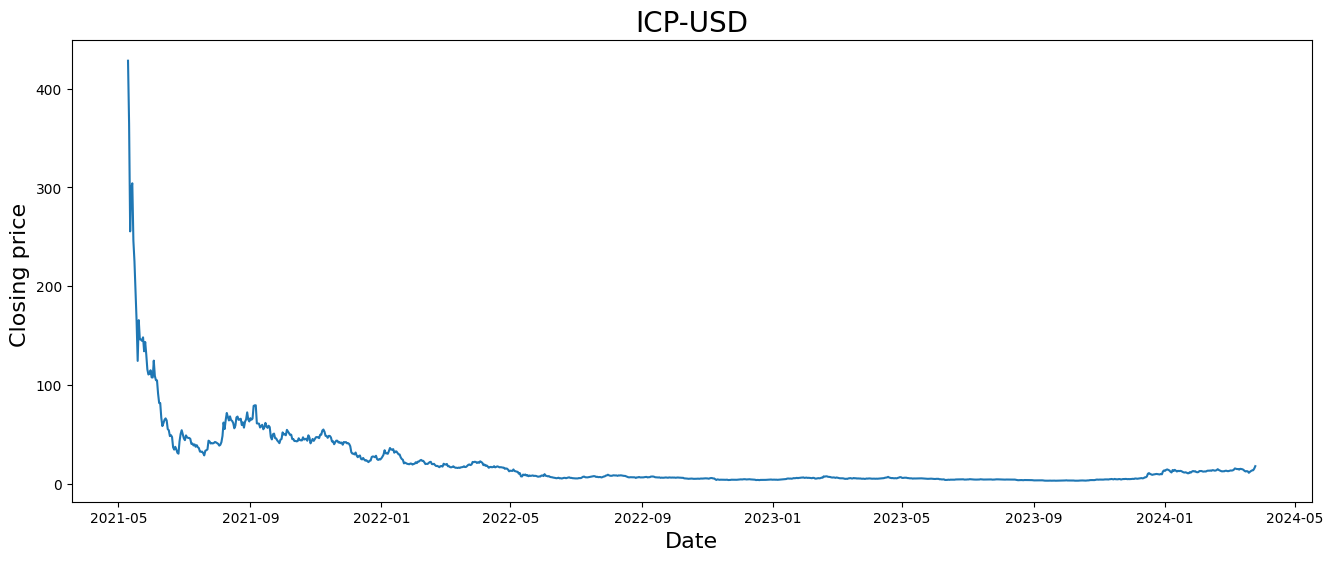

In [6]:
plt.figure(figsize=(16,6))
plt.title("ICP-USD", fontsize=20)
plt.plot(ydata['Close'])
plt.xlabel("Date", fontsize=16)
plt.ylabel("Closing price ", fontsize=16)
plt.show()

In [7]:
close_data= ydata.filter(['Close'])
data=close_data.values

train_len = math.ceil(len(data) * 0.8)
data

array([[428.36230469],
       [364.78997803],
       [255.49424744],
       ...,
       [ 13.47442818],
       [ 15.13399315],
       [ 17.63860703]])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
print(scaled_data.min(), scaled_data.max(), scaled_data.mean())
scaled_data

0.0 1.0000000000000002 0.041132312976575


array([[1.        ],
       [0.85058027],
       [0.59369273],
       ...,
       [0.0248519 ],
       [0.02875252],
       [0.03463934]])

In [9]:
train_data = scaled_data[0:train_len, :]
x_train = []
y_train = []
print(len(train_data))

841


In [10]:
num_of_days=60
for i in range(num_of_days, len(train_data)):
  x_train.append(train_data[i-num_of_days:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([1.        , 0.85058027, 0.59369273, 0.6983465 , 0.70813539,
       0.57143336, 0.5222233 , 0.45373611, 0.37949606, 0.2852896 ,
       0.38231652, 0.3366971 , 0.33622782, 0.33307501, 0.34141434,
       0.30822148, 0.33027334, 0.30062521, 0.26527522, 0.25293921,
       0.25490512, 0.26301118, 0.24607   , 0.24574412, 0.28592098,
       0.24932689, 0.2393755 , 0.23900879, 0.20730937, 0.18505837,
       0.18483449, 0.14969557, 0.13006352, 0.13703797, 0.1449418 ,
       0.14838185, 0.14365069, 0.12298389, 0.12012168, 0.10626609,
       0.10850883, 0.10414687, 0.07959555, 0.07406741, 0.08074531,
       0.07460261, 0.06650797, 0.064393  , 0.0940096 , 0.11116016,
       0.12025949, 0.11049212, 0.10092671, 0.0965933 , 0.10790733,
       0.10330123, 0.10194888, 0.10176244, 0.0997923 , 0.08783974])]
[0.08856801935914393]

[array([1.        , 0.85058027, 0.59369273, 0.6983465 , 0.70813539,
       0.57143336, 0.5222233 , 0.45373611, 0.37949606, 0.2852896 ,
       0.38231652, 0.3366971 , 0.33

In [56]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##First model

###Sequential Model:

Sequential data processing: The model processes sequential data, such as time series or sequences of text.

###Two LSTM Layers with 50 units:
Type: Long Short-Term Memory (LSTM) layer
Units: 50
Output: Returns sequential data (because return_sequences=True)
This layer captures complex temporal dependencies in the input data.

###Dense Layer with 25 units:
Type: Fully connected Dense layer
Units: 25
Output: Non-sequential data
This layer introduces additional complexity and abstraction to the features extracted by the LSTM layer.

###Dense Output Layer with 1 unit:
Type: Fully connected Dense layer
Units: 1
Output: Non-sequential data
This layer produces the final output.

In [65]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
98/98 [==============================] - 8s 48ms/step - loss: 2.9122e-04
Epoch 2/10
98/98 [==============================] - 4s 38ms/step - loss: 1.0556e-04
Epoch 3/10
98/98 [==============================] - 4s 41ms/step - loss: 8.7460e-05
Epoch 4/10
98/98 [==============================] - 5s 48ms/step - loss: 7.4735e-05
Epoch 5/10
98/98 [==============================] - 4s 38ms/step - loss: 6.4115e-05
Epoch 6/10
98/98 [==============================] - 4s 38ms/step - loss: 6.4580e-05
Epoch 7/10
98/98 [==============================] - 5s 48ms/step - loss: 5.7555e-05
Epoch 8/10
98/98 [==============================] - 4s 41ms/step - loss: 7.1165e-05
Epoch 9/10
98/98 [==============================] - 5s 48ms/step - loss: 5.2252e-05
Epoch 10/10
98/98 [==============================] - 5s 49ms/step - loss: 5.4619e-05


In [68]:
test_data = scaled_data[train_len-num_of_days:, :]
x_test = []
y_test = data[train_len:, :]
for i in range(num_of_days, len(test_data)):
  x_test.append(test_data[i-num_of_days:i, 0])
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(210, 60)
(210, 60, 1)


In [71]:
#  predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# rmse error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7/7 [==============================] - 0s 29ms/step


0.3515430734271095

In [70]:
train = close_data[:train_len]
valid = close_data[train_len:].copy()
valid['Predictions'] = predictions


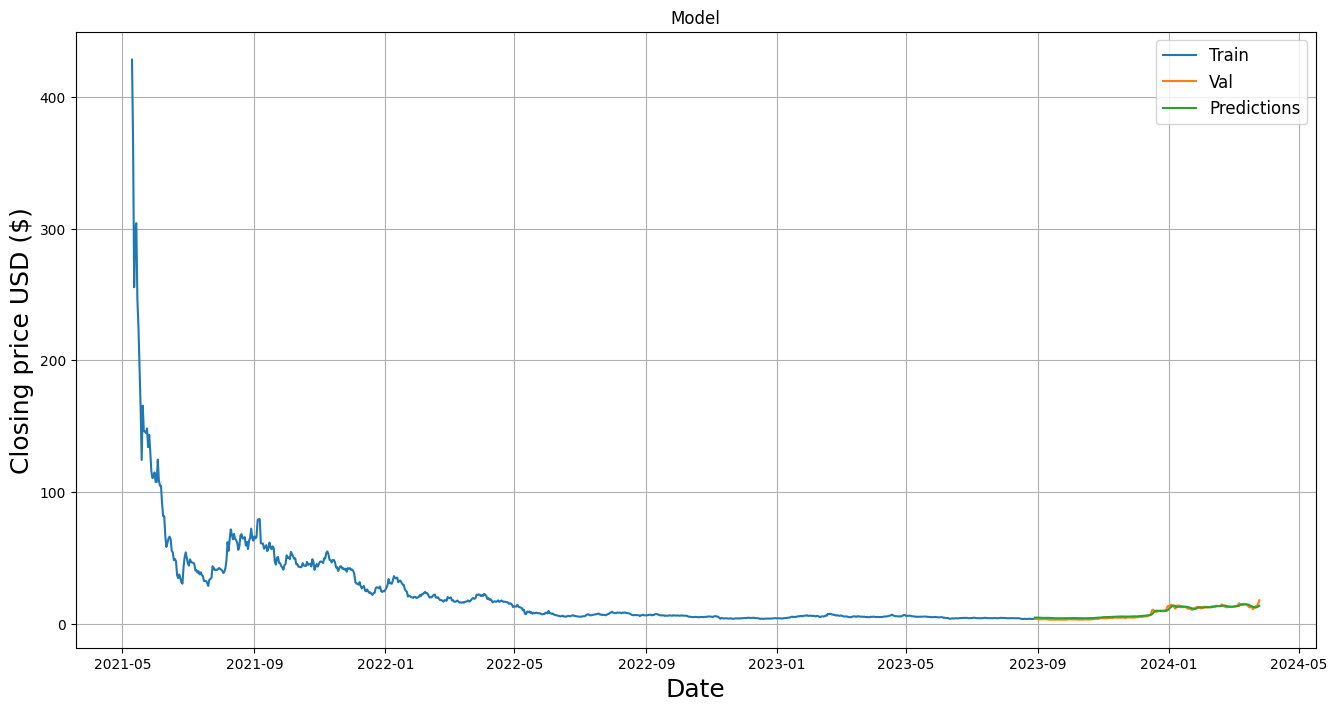

In [64]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], fontsize=12)
plt.grid(True)
plt.show()

In [24]:
recent_data = scaled_data[-num_of_days:].reshape(1, num_of_days, 1)

future_predictions = []

next_prediction = model.predict(recent_data)
future_predictions = scaler.inverse_transform(next_prediction)
future_predictions[0][0]

1/1 [==============================] - 0s 88ms/step


13.480733

##Second model

###Sequential Model:

Sequential data processing: The model processes sequential data, such as time series or sequences of text.

###One LSTM Layers with 60 units:
Type: Long Short-Term Memory (LSTM) layer
Units: 50
Output: Returns sequential data (because return_sequences=True)
This layer captures complex temporal dependencies in the input data.

###Dense Layer with 25 units:
Type: Fully connected Dense layer
Units: 25
Output: Non-sequential data
This layer introduces additional complexity and abstraction to the features extracted by the LSTM layer.

###Dense Output Layer with 1 unit:
Type: Fully connected Dense layer
Units: 1
Output: Non-sequential data
This layer produces the final output.

In [73]:
# Build LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=8, epochs=10)
model.summary()

Epoch 1/10
98/98 [==============================] - 7s 23ms/step - loss: 1.6797e-04
Epoch 2/10
98/98 [==============================] - 3s 26ms/step - loss: 4.5582e-05
Epoch 3/10
98/98 [==============================] - 2s 20ms/step - loss: 5.3592e-05
Epoch 4/10
98/98 [==============================] - 2s 19ms/step - loss: 4.7164e-05
Epoch 5/10
98/98 [==============================] - 2s 20ms/step - loss: 4.5702e-05
Epoch 6/10
98/98 [==============================] - 2s 21ms/step - loss: 3.8405e-05
Epoch 7/10
98/98 [==============================] - 3s 28ms/step - loss: 3.5659e-05
Epoch 8/10
98/98 [==============================] - 2s 22ms/step - loss: 3.3305e-05
Epoch 9/10
98/98 [==============================] - 2s 19ms/step - loss: 3.8145e-05
Epoch 10/10
98/98 [==============================] - 2s 20ms/step - loss: 3.1687e-05
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm

In [39]:
test_data = scaled_data[train_len-num_of_days:, :]
x_test = []
y_test = data[train_len:, :]
for i in range(num_of_days, len(test_data)):
  x_test.append(test_data[i-num_of_days:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [74]:
#  predicted price values
predictions_2 = model.predict(x_test)
predictions_2 = scaler.inverse_transform(predictions_2)
# rmse error
rmse = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse

7/7 [==============================] - 1s 14ms/step


0.27230367887587775

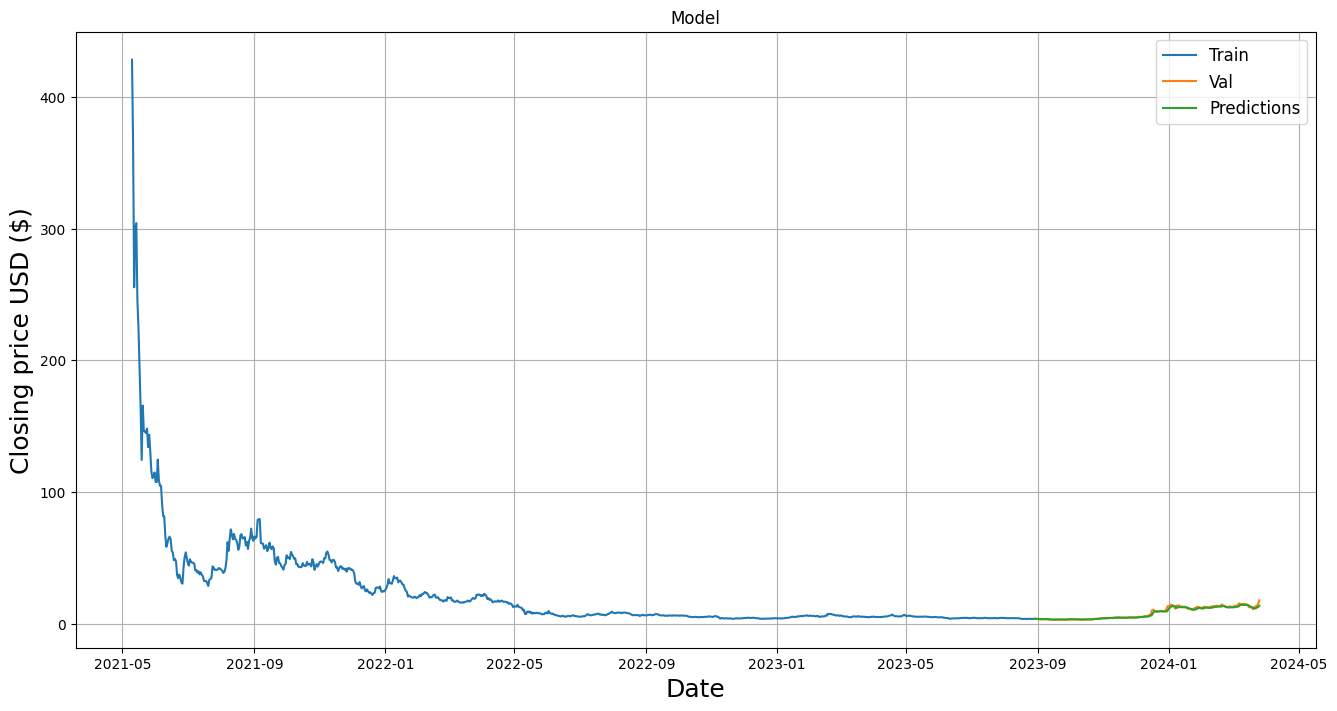

In [75]:
train = close_data[:train_len]
valid = close_data[train_len:].copy()
valid['Predictions'] = predictions_2
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], fontsize=12)
plt.grid(True)
plt.show()

##Third model

###Sequential Model:

Sequential data processing: The model processes sequential data, such as time series or sequences of text.

###Three LSTM Layers with 50 units:
Type: Long Short-Term Memory (LSTM) layer
Units: 50
Output: Returns sequential data (because return_sequences=True)
This layer captures complex temporal dependencies in the input data.

###Dense Layer with 25 units:
Type: Fully connected Dense layer
Units: 25
Output: Non-sequential data
This layer introduces additional complexity and abstraction to the features extracted by the LSTM layer.

###Dense Output Layer with 1 unit:
Type: Fully connected Dense layer
Units: 1
Output: Non-sequential data
This layer produces the final output.

In [76]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_11 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 25)                1275      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 52101 (203.52 KB)
Trainable params: 52101 (203.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
98/98 [==============================] - 14s 69ms/step - loss: 3.1158e-04
Epoch 2/10
98/98 [==============================] - 6s 59ms/step - loss: 1.2143e-04
Epoch 3/10
98/98 [==============================] - 7s 70ms/step - loss: 1.2071e-04
Epoch 4/10
98/98 [==============================] - 6s 61ms/step - loss: 9.6639e-05
Epoch 5/10
98/98 [==============================] - 7s 69ms/step - loss: 8.6230e-05
Epoch 6/10
98/98 [==============================] - 6s 60ms/step - loss: 8.1721e-05
Epoch 7/10
98/98 [==============================] - 7s 69ms/step - loss: 7.9881e-05
Epoch 8/10
98/98 [==============================] - 6s 60ms/step - loss: 8.4186e-05
Epoch 9/10
98/98 [==============================] - 7s 70ms/step - loss: 7.7269e-05
Epoch 10/10
98/98 [==============================] - 6s 60ms/step - loss: 7.3422e-05


In [79]:
test_data = scaled_data[train_len-num_of_days:, :]
x_test = []
y_test = data[train_len:, :]
for i in range(num_of_days, len(test_data)):
  x_test.append(test_data[i-num_of_days:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#  predicted price values
predictions_2 = model.predict(x_test)
predictions_2 = scaler.inverse_transform(predictions_2)
# rmse error
rmse = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse

7/7 [==============================] - 2s 25ms/step


0.431751104763576

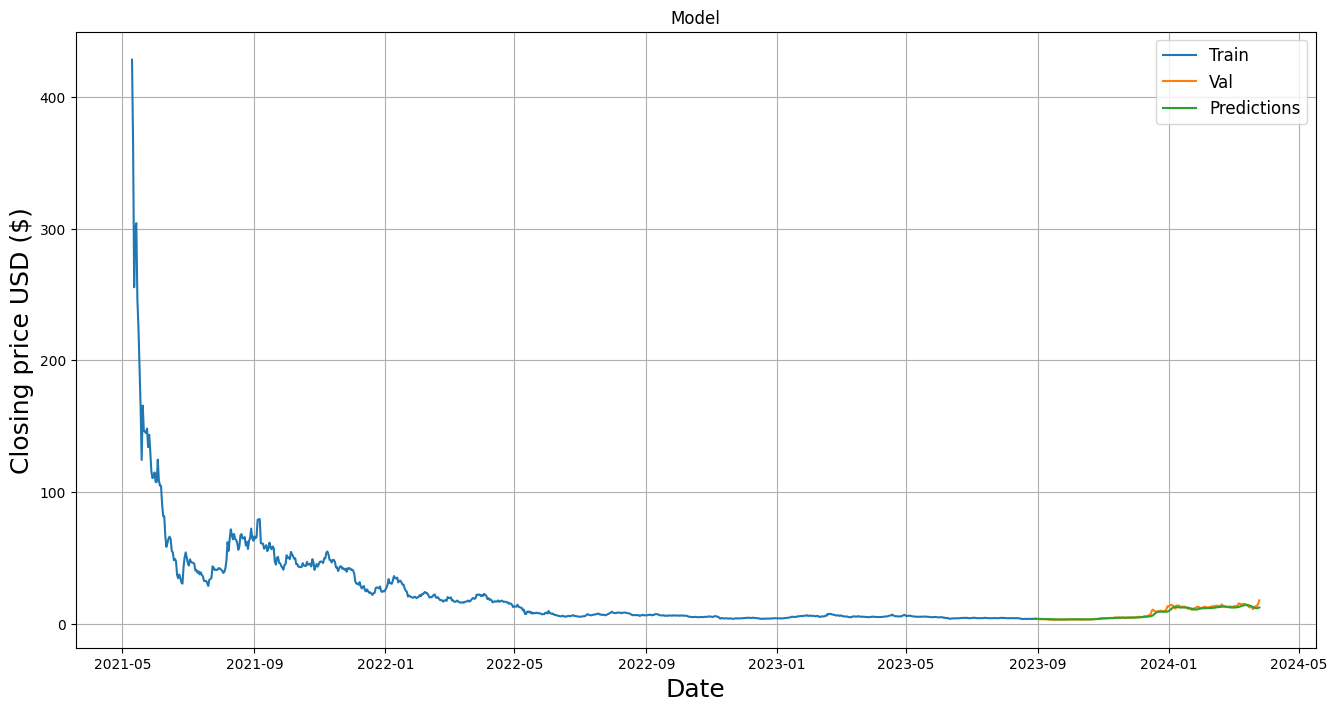

In [80]:
train = close_data[:train_len]
valid = close_data[train_len:].copy()
valid['Predictions'] = predictions_2
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], fontsize=12)
plt.grid(True)
plt.show()